### Corner Detection
****


The <b>Harris Corner Detector</b> is an algorithm used for detecting corners in images. Corners are points in an image where there are large variations in intensity in all directions. They are important features in image processing, as they can be used for tasks such as object recognition, tracking, and matching.

The Harris Corner Detector algorithm calculates a response function at each pixel location in an image, which is used to determine whether that location is a corner or not. The response function is based on the difference in intensity between neighboring pixels, and is calculated as follows:

<ol>
<li>Calculate the gradient of the image using a Sobel filter.</li>
<li>Compute the products of gradients at each pixel location.</li>
<li>Convolve the product of gradients with a Gaussian window to obtain a weighted sum of products of gradients in a local neighborhood.</li>
<li>Calculate the Harris response function at each pixel location as the determinant of a matrix formed from the weighted sum of products of gradients, and the sum of squares of gradients at that location.</li>
</ol>
The Harris response function is given by the formula:

R = det(M) - k * (trace(M))^2

where M is a matrix formed from the weighted sum of products of gradients in a local neighborhood, det(M) is the determinant of M, trace(M) is the sum of the diagonal elements of M, and k is an empirically determined constant.

The Harris response function is used to determine whether a pixel location is a corner or not. Pixels with high values of R are considered corners, while those with low values of R are not. The corners can then be identified by thresholding the response function, and performing non-maximum suppression to remove duplicate corners.

In summary, the Harris Corner Detector algorithm calculates the Harris response function at each pixel location in an image, and uses this function to detect corners. The algorithm is widely used in computer vision applications, and has been shown to be robust to noise, occlusion, and other image artifacts.

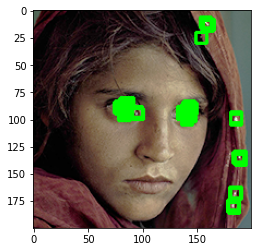

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load image
img = cv2.imread("Graphics/face.png")

# Convert to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Perform Canny edge detection
edges = cv2.Canny(gray, 100, 200)

# Perform Harris Corner Detection
corner_dst = cv2.cornerHarris(gray, 2, 3, 0.04)

# Normalize corner response values
cv2.normalize(corner_dst, corner_dst, 0, 255, cv2.NORM_MINMAX)

# Set threshold for corner response
thresh = 100

# Draw bounding boxes around detected corners
for i in range(corner_dst.shape[0]):
    for j in range(corner_dst.shape[1]):
        if corner_dst[i][j] > thresh:
            cv2.rectangle(img, (j-5, i-5), (j+5, i+5), (0, 255, 0), 2)

img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

The <b>Shi-Tomasi Corner Detector</b> is an algorithm used for detecting corners in images, similar to the Harris Corner Detector. It was developed by Jianbo Shi and Carlo Tomasi in 1994 as an improvement over the Harris Corner Detector.

The Shi-Tomasi Corner Detector uses a different measure of corner quality than the Harris Corner Detector, which makes it more reliable and accurate in some cases. Instead of using the Harris response function, the Shi-Tomasi Corner Detector uses the minimum eigenvalue of a matrix formed from the gradients of the image.

The algorithm works as follows:

<ol>
<li>Compute the gradient of the image using a Sobel filter.</li>
<li>Compute the minimum eigenvalue of a 2x2 matrix formed from the gradients in a small window around each pixel location.</li>
<li>Sort the eigenvalues in ascending order, and select the minimum eigenvalue as the measure of corner quality for that pixel location.</li>
<li>Threshold the minimum eigenvalues to obtain a list of candidate corners.</li>
<li>Perform non-maximum suppression to eliminate duplicate corners.</li>

</ol>
The minimum eigenvalue is used as the measure of corner quality because it is sensitive to changes in all directions, unlike the Harris response function which is sensitive to changes in specific directions. This makes the Shi-Tomasi Corner Detector more reliable and accurate in detecting corners than the Harris Corner Detector.

The algorithm can be further improved by using a quality score based on the minimum eigenvalue and the distance between corners, instead of just the minimum eigenvalue. This is called the "good features to track" algorithm, and is often used in computer vision applications.

In summary, the Shi-Tomasi Corner Detector is an algorithm used for detecting corners in images. It uses the minimum eigenvalue of a matrix formed from the gradients of the image as the measure of corner quality, making it more reliable and accurate than the Harris Corner Detector in some cases.

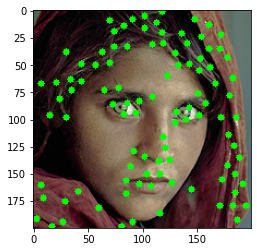

In [3]:
# Load image
img = cv2.imread("Graphics/face.png")

# Convert to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Perform Shi-Tomasi Corner Detection
corners = cv2.goodFeaturesToTrack(gray, 100, 0.01, 10)

# Draw markers around detected corners
for corner in corners:
    x, y = corner.ravel().astype(int) # convert to integer type
    cv2.circle(img, (x, y), 3, (0, 255, 0), -1)

img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
